# **Detect Outliers**

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [4]:
df_original = pd.read_csv('../results/outputs/encoded_data.csv')
print("Original dataset head:\n", df_original.head())

Original dataset head:
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        1               0        0              1   
1       0   71        1               1        0              0   
2       0   61        1               0        0              1   
3       0   55        1               1        0              1   
4       1   56        1               0        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         0                  1         1   
1                1         0         1         1                  0         0   
2                1         0         1         1                  0         0   
3                0         0         0         1                  1         0   
4                0         1         1         1                  1         0   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0            

### Define outlier removal function (IQR method for AGE)

In [5]:
def remove_outliers(df):
    # Calculate Q1, Q3, and IQR for AGE column
    Q1 = df['AGE'].quantile(0.25)
    Q3 = df['AGE'].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter data
    df_no_outliers = df[(df['AGE'] >= lower_bound) & (df['AGE'] <= upper_bound)]
    return df_no_outliers

### Report changes

In [11]:
print(f"Original shape: {df_original.shape}, Shape after outlier removal: {df_processed.shape}")
print(f"Outliers removed: {df_original.shape[0] - df_processed.shape[0]} rows")

Original shape: (20000, 16), Shape after outlier removal: (19847, 16)
Outliers removed: 153 rows


## Remove outliers

In [6]:
#cleaned dataset
df_processed = remove_outliers(df_original)

# **Visualizing boxplots**

### Before outlier removal

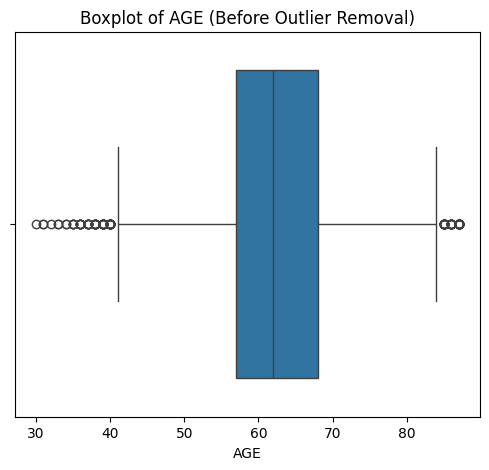

In [7]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df_original['AGE'])
plt.title('Boxplot of AGE (Before Outlier Removal)')
plt.savefig('../results/eda_visualizations/IT24101291/boxplot_before_outlier_removal.png')
plt.show()

## After outlier removal

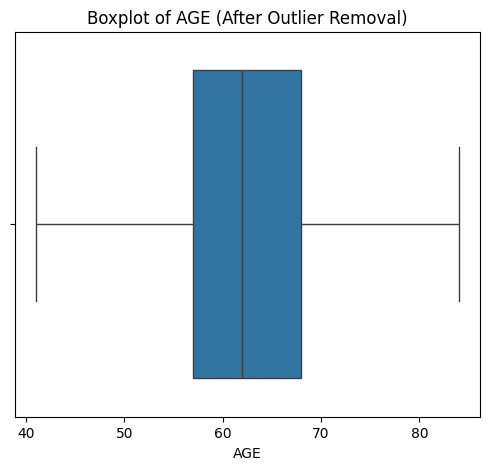

In [8]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df_processed['AGE'])
plt.title('Boxplot of AGE (After Outlier Removal)')
plt.savefig('../results/eda_visualizations/IT24101291/boxplot_after_outlier_removal.png')
plt.show()

## Display sample of processed data

In [9]:
print("Sample of data after outlier removal:\n", df_processed.head())

Sample of data after outlier removal:
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        1               0        0              1   
1       0   71        1               1        0              0   
2       0   61        1               0        0              1   
3       0   55        1               1        0              1   
4       1   56        1               0        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         0                  1         1   
1                1         0         1         1                  0         0   
2                1         0         1         1                  0         0   
3                0         0         0         1                  1         0   
4                0         1         1         1                  1         0   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER 

### Save the processed dataset

In [10]:
df_processed.to_csv('../results/outputs/outlier_removed_data.csv', index=False)
print("Saved processed dataset to '../results/outputs/outlier_removed_data.csv'")

Saved processed dataset to '../results/outputs/outlier_removed_data.csv'
